# Import Libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn import under_sampling, over_sampling
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# Load Data and Prelimary Look

In [2]:
# load dataframe
train = pd.read_csv('train.csv')

In [3]:
# preview the first 5 rows
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
# dataframe general information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

**Informasi kolom** :

1. state : US state
2. account_length : total bulan customer menjadi user telco provider
3. area_code : kode area
4. international_plan : customer memiliki plan international(Yes,No)
5. voice_mail_plan : customer memiliki plan voice mail(Yes,No)
6. number_vmail_messages : total pesan voice mail
7. total_day_minutes : total menit pada day calls
8. total_day_calls : total day calls
9. total_day_charge : total charge pada day calls
10. total_eve_minutes : total menit pada evening calls
11. total_eve_calls : total evening calls
12. total_eve_charges : total charge pada evening calls
13. total_night_minutes : total menit pada night calls
14. total_night_calls : total night calls
15. total_night_charge : total charge pada night calls
16. total_intl_minutes : total menit pada international calls
17. total_intl_calls : total intternasional calls
18. total_intl_charges : total charge pada internasional calls
19. number_customer_service_calls : total calls kepada customer services
20. churn : customer churn(Yes,No)

dataset terdiri dari 4250 baris dan 20 kolom.

# Data Cleaning

## Check Missing Value

In [5]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## Check Data Duplicated

In [6]:
train.duplicated().sum()

0

kualitas data sudah baik, tidak terdapat missing value dan duplikat value

# Exploratory Data Analysis

## Statistical summary

In [7]:
# Group column names based on type
cats = ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']
nums = ['account_length', 'number_vmail_messages', 'total_day_minutes',
        'total_day_calls', 'total_day_charge', 'total_eve_minutes',
        'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
        'total_night_calls', 'total_night_charge', 'total_intl_minutes',
        'total_intl_calls','total_intl_charge','number_customer_service_calls']

In [8]:
# Descriptive statistic based on numericals features
train[nums].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


observasi:
- value numerical fitur bagus, tidak ada value yang tidak masuk akal seperti nilai minus.
- hampir seluruh fitur berdistribusi data normal(mean -+ median).
- kecuali fitur 'number_vmail_messages' dan 'number_customer_service_calls' distribusi datanya positif skew.

In [9]:
# Descriptive statistic based on categoricals features
train[cats].describe()

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


## Proportion Cust Churn

mengetahui berapa proporsi dari customer churn

In [10]:
# hitung jumlah cust churn
churn = train['churn'].value_counts()
churn

no     3652
yes     598
Name: churn, dtype: int64

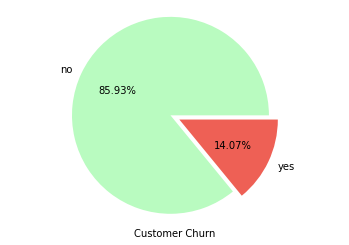

In [11]:
# ketahui proporsi dari cust churn
label = churn.index
count = churn.values
colors=['#b9fbc0', '#ee6055']
explode=(0,0.1)

plt.pie(count, labels=label,
        colors=colors,
        explode=explode,
        autopct='%1.2f%%')
plt.xlabel('Customer Churn')
plt.axis('equal')
plt.show()

In [12]:
# split dataset which are the loyal cust and they aren't
churn_yes = train[train['churn']=='yes'].reset_index()
churn_no = train[train['churn']=='no'].reset_index()

## Churn Rate by State

In [13]:
# pilih kolom yang dibutuhkan dan di groupby
cust_state = train.groupby(['state','churn']).agg(
    total=('churn','count')
    ).reset_index()

In [14]:
df_pivot = pd.pivot_table(cust_state,
               index='state',
               columns='churn',
               values='total',
               aggfunc='sum')

In [15]:
# top 5 churn rate by state
df_pivot['total'] = df_pivot['yes'] + df_pivot['no']
df_pivot['churn_rate'] = df_pivot['yes'] / df_pivot['total'] * 100
df_pivot = df_pivot.round(2)
df_pivot.sort_values('churn_rate', ascending=False).head(5)

churn,no,yes,total,churn_rate
state,,,,
NJ,70,26,96,27.08
CA,29,10,39,25.64
WA,62,18,80,22.50
MD,67,19,86,22.09
MT,63,17,80,21.25


In [16]:
df_pivot.describe()

churn,no,yes,total,churn_rate
count,51.000000,51.000000,51.000000,51.000000
mean,71.607843,11.725490,83.333333,14.053137
std,13.311767,4.771073,15.000889,5.117210
min,29.000000,4.000000,39.000000,5.000000
25%,64.000000,7.500000,76.500000,11.025000
50%,70.000000,12.000000,80.000000,12.870000
75%,77.500000,15.000000,91.500000,17.240000
max,120.000000,26.000000,139.000000,27.080000


observasi:
- churn rate berdasar state kurang lebih mirip tidak berbeda jauh
- persebaran cust churn tidak dipengaruhi state


In [17]:
intl = train.groupby(['churn','international_plan']).agg(
    jumlah_cust_churn=('churn','count')
    ).reset_index()
intl

,churn,international_plan,jumlah_cust_churn
0,no,no,3423
1,no,yes,229
2,yes,no,431
3,yes,yes,167


In [18]:
intl_pivot = pd.pivot_table(intl,
                          index='churn',
                          columns='international_plan')
intl_pivot.columns = [str(j) for j in intl_pivot.columns.get_level_values(1)]

inter = intl_pivot.reset_index()
inter.rename(columns={'no':'Interplan_no', 'yes':'interplan_yes'}, inplace=True)
inter

,churn,Interplan_no,interplan_yes
0,no,3423,229
1,yes,431,167


observasi:

- secara dari durasi, jumlah, dan charge dari internasional fitur memiliki nilai relatif yg sama akan tetapi proporsi cust churn itu meningkat jika punya internasional plan.
- kenapa?apa dari segi harga?tidak, total charge internasional call realtif sama.
- pelayanan?mungkin.

## Check Account Length Feature

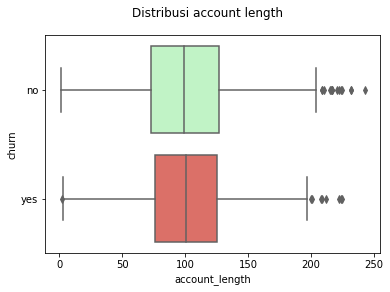

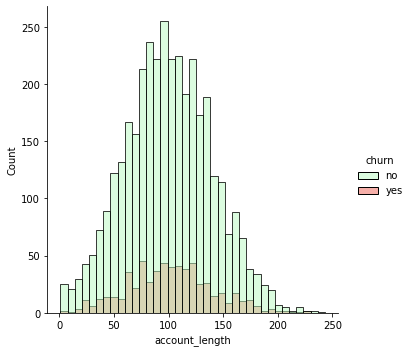

In [19]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi account length')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['account_length'], palette=palette)
sns.displot(x=train['account_length'], hue=train['churn'], palette=palette)
plt.show()

In [20]:
train.groupby('churn').agg(
    med_length=('account_length','median')
    ).reset_index()

,churn,med_length
0,no,99.0
1,yes,101.0


observasi:
- median antara customer yang churn dan tidak relatif memiliki nilai yang kurang lebih sama berarti durasi dari user telecom tidak berpengaruh pada churn

## Check Voice Mail Feature

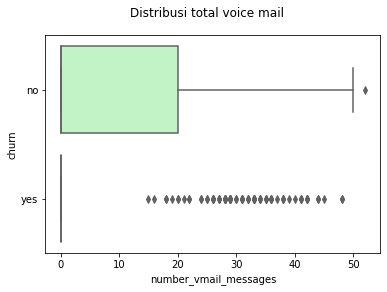

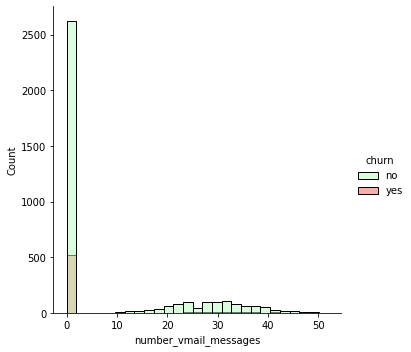

In [21]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total voice mail')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['number_vmail_messages'], palette=palette)
sns.displot(x=train['number_vmail_messages'], hue=train['churn'], palette=palette)
plt.show()

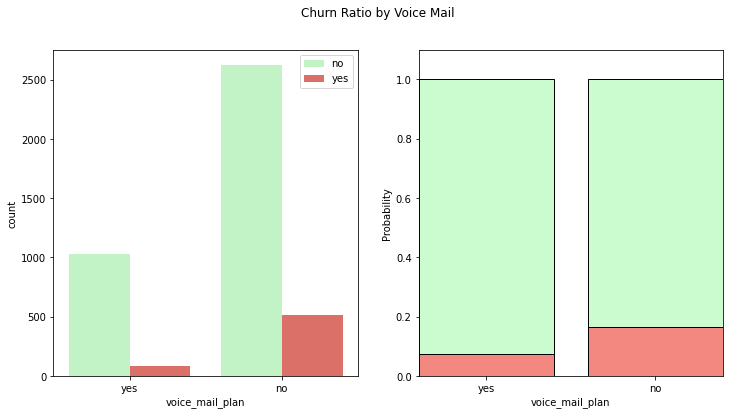

In [22]:
# cek berapa dan probability cust churn by voice mail
fig, ax = plt.subplots(1,2,figsize=(12,6))
palette = ['#b9fbc0', '#ee6055']
fig.suptitle('Churn Ratio by Voice Mail')

sns.countplot(ax=ax[0], data=train, x=train['voice_mail_plan'],
              hue=train['churn'], palette=palette)
sns.histplot(ax=ax[1], data=train, x=train['voice_mail_plan'],
              hue=train['churn'], stat='probability', multiple='fill',
             shrink=.8, legend=False, palette=palette)
ax[0].legend(loc='upper right')
ax[1].set_ylim(0,1.1)
plt.show()

In [23]:
vmail = train.groupby(['churn','voice_mail_plan']).agg(
    jumlah_cust_churn=('churn','count')
    ).reset_index()
vmail

,churn,voice_mail_plan,jumlah_cust_churn
0,no,no,2622
1,no,yes,1030
2,yes,no,516
3,yes,yes,82


In [24]:
vmail_pivot = pd.pivot_table(vmail,
                          index='churn',
                          columns='voice_mail_plan')
vmail_pivot.columns = [str(j) for j in vmail_pivot.columns.get_level_values(1)]

voicemail = vmail_pivot.reset_index()
voicemail.rename(columns={'no':'voiceplan_no', 'yes':'voiceplan_yes'}, inplace=True)
voicemail

,churn,voiceplan_no,voiceplan_yes
0,no,2622,1030
1,yes,516,82


observasi:
- dari distribusi feature terlihat bahwa customer yang churn itu bukan pengguna voice mail plan ataupun jika pengguna mereka jarang sekali menggunakan voice mail(dilihat dari distribusi yang menumpuk pada nilai 0).
- dari churn rate terlihat bahwa memang probability customer churn dipengaruhi jika customer tidak memiliki voice mail plan hampir -+17% dari jumlah customer yang tidak memiliki voice mail, atau -+95% dari total yang churn.

## Check Day Call Feature

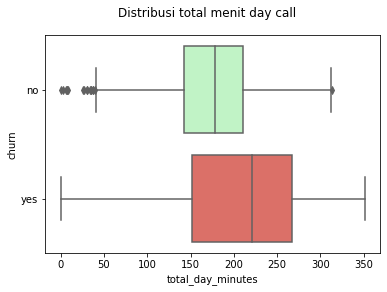

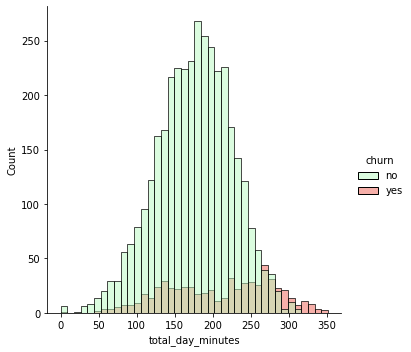

In [25]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total menit day call')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_day_minutes'], palette=palette)
sns.displot(x=train['total_day_minutes'], hue=train['churn'], palette=palette)
plt.show()

In [26]:
train.groupby('churn').agg(
    med_day_menit=('total_day_minutes','median')
    ).reset_index()

,churn,med_day_menit
0,no,178.25
1,yes,220.55


observasi:
- terdapat perbedaan antara customer churn dan yg tidak, cust churn relatif menelepon lebih lama ketimbang cust yg tidak churn.
- ada pengaruh by state?lets see


In [27]:
# group by column berdasar state dan median day minutes
day_length = train.groupby(['state', 'churn']).agg(
    med_length=('total_day_minutes','median')
).reset_index()
day_length

,state,churn,med_length
0,AK,no,176.10
1,AK,yes,210.30
2,AL,no,189.75
3,AL,yes,264.90
4,AR,no,167.35
...,...,...,...
97,WI,yes,225.20
98,WV,no,178.85
99,WV,yes,196.70
100,WY,no,180.70


In [28]:
# lakukan pivot table
df_pivotlength = pd.pivot_table(day_length,
               index='state',
               columns='churn',
               values='med_length',
               aggfunc='sum')
# filter dataframe dimana state yang median churn nya melebihi 220 menit
df_220 = df_pivotlength[df_pivotlength['yes']>220]
df_220.sort_values('yes', ascending=False).reset_index().head()

churn,state,no,yes
0,HI,181.60,286.45
1,KS,182.55,267.90
2,FL,176.00,266.60
3,AL,189.75,264.90
4,OK,181.75,261.05


observasi:
- sebanyak 24 us state yang melebihi nilai median durasi day call.
- peresebaran data tidak jauh
- durasi day call tidak berpengaruh pada state

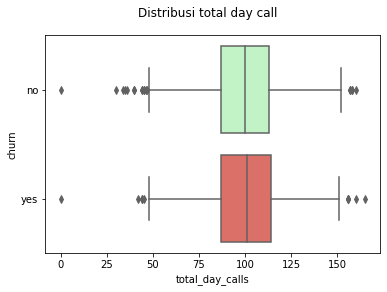

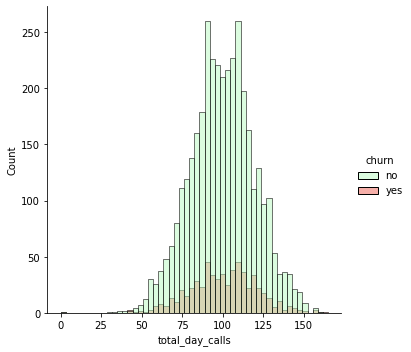

In [29]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total day call')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_day_calls'], palette=palette)
sns.displot(x=train['total_day_calls'], hue=train['churn'], palette=palette)
plt.show()

In [30]:
train.groupby('churn').agg(
    med_day_call=('total_day_calls','median')
    ).reset_index()

,churn,med_day_call
0,no,100.0
1,yes,101.0


observasi:
- secara median, jumlah telepon pada day call tidak berpengaruh karena kurang lebih mirip

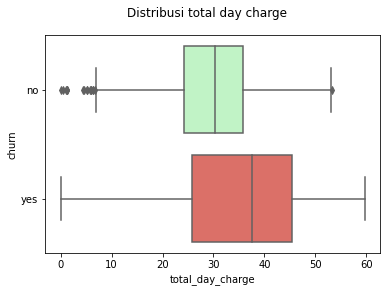

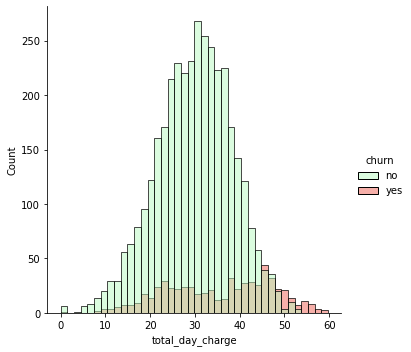

In [31]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total day charge')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_day_charge'], palette=palette)
sns.displot(x=train['total_day_charge'], hue=train['churn'], palette=palette)
plt.show()

In [32]:
train.groupby('churn').agg(
    med_day_charge=('total_day_charge','median')
    ).reset_index()

,churn,med_day_charge
0,no,30.300
1,yes,37.495


observasi:
- hal ini cukup wajar karena customer yang churn durasi telepon day call lebih banyak sehingga charge nya pun lebih daripada cust yang tidak churn.
- siapa yang charge lebih banyak? mari cek by state

In [33]:
# group by column berdasar state dan median day charges
day_charge = train.groupby(['state', 'churn']).agg(
    med_charge=('total_day_charge','median')
).reset_index()
day_charge

,state,churn,med_charge
0,AK,no,29.940
1,AK,yes,35.750
2,AL,no,32.260
3,AL,yes,45.030
4,AR,no,28.450
...,...,...,...
97,WI,yes,38.280
98,WV,no,30.405
99,WV,yes,33.440
100,WY,no,30.720


In [34]:
# lakukan pivot table
df_pivotcharge = pd.pivot_table(day_charge,
               index='state',
               columns='churn',
               values='med_charge',
               aggfunc='sum')
# filter dataframe dimana state yang median churn nya melebihi 38 USD($)
df_38 = df_pivotcharge[df_pivotcharge['yes']>38]
df_38.sort_values('yes', ascending=False).reset_index().head()

churn,state,no,yes
0,HI,30.870,48.695
1,KS,31.030,45.540
2,FL,29.920,45.320
3,AL,32.260,45.030
4,OK,30.895,44.380


observasi:
- sebanyak 22 us state yang melebihi nilai median durasi day charge.
- peresebaran data tidak jauh
- durasi day charge tidak berpengaruh pada state

## Check Eve Call Feature

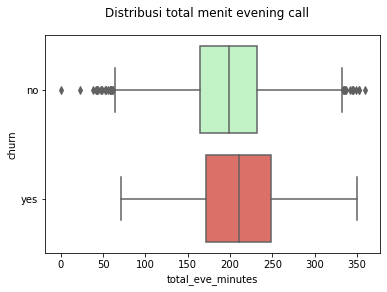

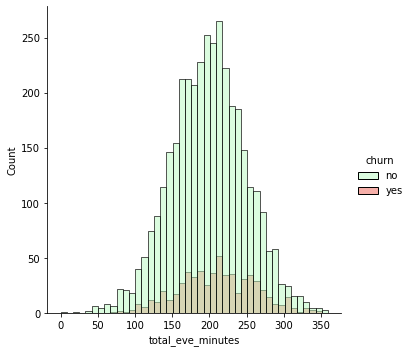

In [35]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total menit evening call')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_eve_minutes'], palette=palette)
sns.displot(x=train['total_eve_minutes'], hue=train['churn'], palette=palette)
plt.show()

In [36]:
train.groupby('churn').agg(
    med_eve_menit=('total_eve_minutes','median')
    ).reset_index()

,churn,med_eve_menit
0,no,199.2
1,yes,210.2


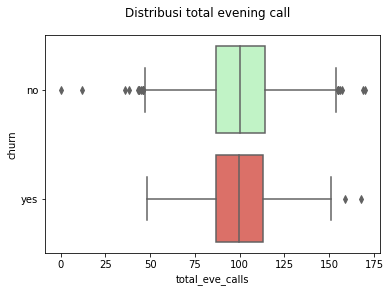

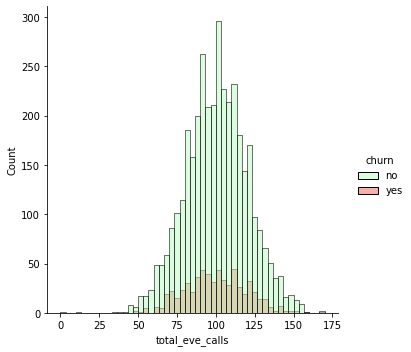

In [37]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total evening call')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_eve_calls'], palette=palette)
sns.displot(x=train['total_eve_calls'], hue=train['churn'], palette=palette)
plt.show()

In [38]:
train.groupby('churn').agg(
    med_eve_call=('total_eve_calls','median')
    ).reset_index()

,churn,med_eve_call
0,no,100.0
1,yes,99.5


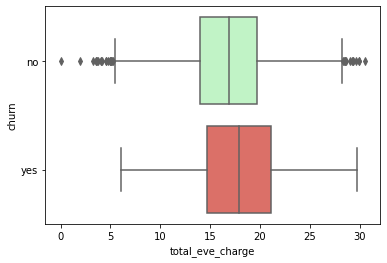

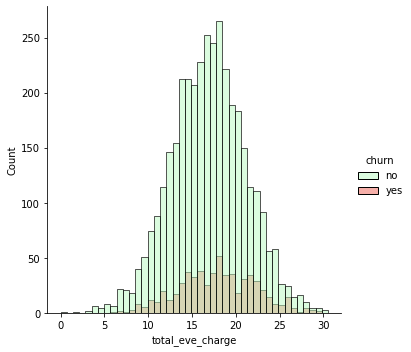

In [39]:
# cek outlier dan distribusi data
ig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total evening charge')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_eve_charge'], palette=palette)
sns.displot(x=train['total_eve_charge'], hue=train['churn'], palette=palette)
plt.show()

In [40]:
train.groupby('churn').agg(
    med_eve_charge=('total_eve_charge','median')
    ).reset_index()

,churn,med_eve_charge
0,no,16.93
1,yes,17.87


observasi:
- terdapat perbedaan pd cust churn juga lebih banyak sekitar 10 menit bertelepon pd 'evening', akan tetapi tidak terlalu signifikan
- di lain hal, seperti jumlah call dan charge pada 'evening' relatif sama
- evening feature tidak berpengaruh pada cust churn

## Check Night Call Feature

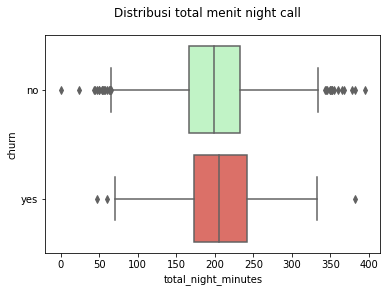

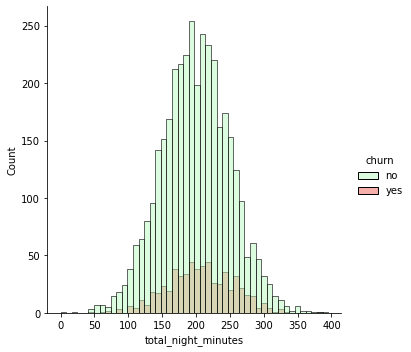

In [41]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total menit night call')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_night_minutes'], palette=palette)
sns.displot(x=train['total_night_minutes'], hue=train['churn'], palette=palette)
plt.show()

In [42]:
train.groupby('churn').agg(
    med_night_menit=('total_night_minutes','median')
    ).reset_index()

,churn,med_night_menit
0,no,199.3
1,yes,206.1


observasi:
- terjadi perbedaan cust churn melakukan 'night call' lebih lama tapi tidak signifikan

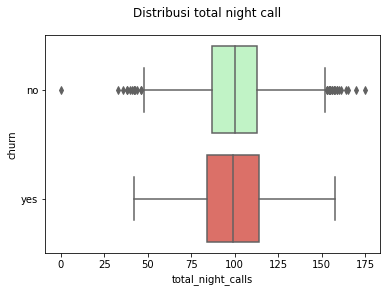

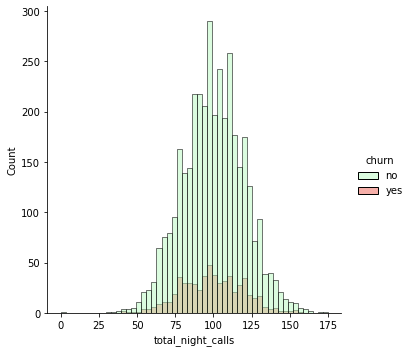

In [43]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total night call')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_night_calls'], palette=palette)
sns.displot(x=train['total_night_calls'], hue=train['churn'], palette=palette)
plt.show()

In [44]:
train.groupby('churn').agg(
    med_night_call=('total_night_calls','median')
    ).reset_index()

,churn,med_night_call
0,no,100.0
1,yes,99.0


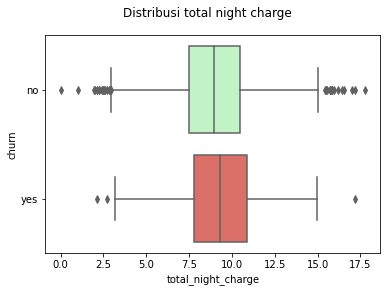

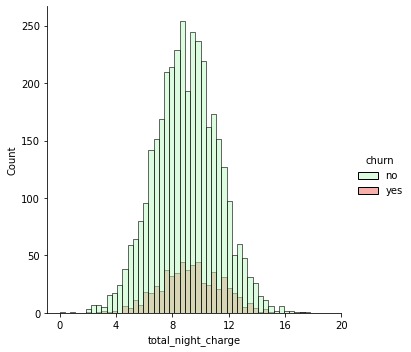

In [45]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total night charge')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_night_charge'], palette=palette)
sns.displot(x=train['total_night_charge'], hue=train['churn'], palette=palette)
plt.xticks([0,4,8,12,16,20])
plt.show()

In [46]:
train.groupby('churn').agg(
    med_night_charge=('total_night_charge','median')
    ).reset_index()

,churn,med_night_charge
0,no,8.970
1,yes,9.275


observasi:
- terdapat perbedaan pd cust churn juga lebih banyak sekitar 7 menit bertelepon pd 'night', akan tetapi tidak terlalu signifikan
- di lain hal, seperti jumlah call dan charge pada 'night' relatif sama
- night feature tidak berpengaruh pada cust churn

## Check International Call Feature

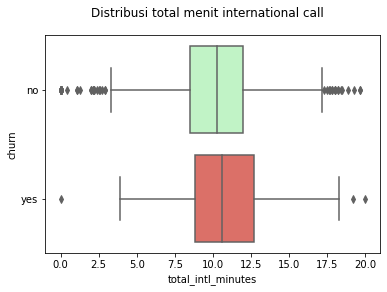

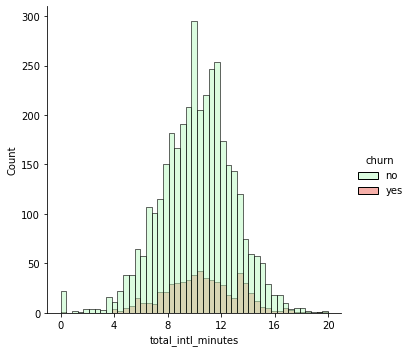

In [47]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total menit international call')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_intl_minutes'], palette=palette)
sns.displot(x=train['total_intl_minutes'], hue=train['churn'], palette=palette)
plt.xticks([0,4,8,12,16,20])
plt.show()

In [48]:
train.groupby('churn').agg(
    med_intl_menit=('total_intl_minutes','median')
    ).reset_index()

,churn,med_intl_menit
0,no,10.3
1,yes,10.6


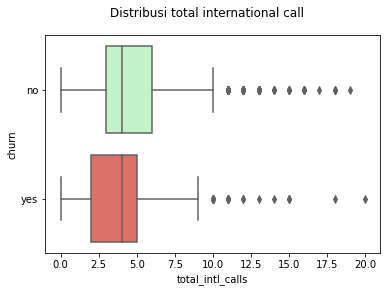

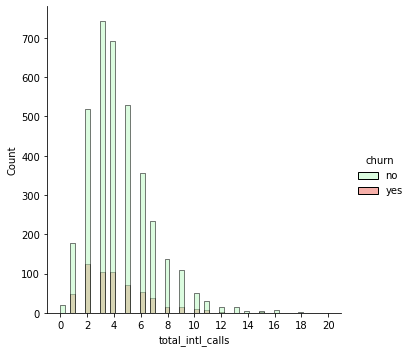

In [49]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total international call')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_intl_calls'], palette=palette)
sns.displot(x=train['total_intl_calls'], hue=train['churn'], palette=palette)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.show()

In [50]:
train.groupby('churn').agg(
    med_intl_call=('total_intl_calls','median')
    ).reset_index()

,churn,med_intl_call
0,no,4.0
1,yes,4.0


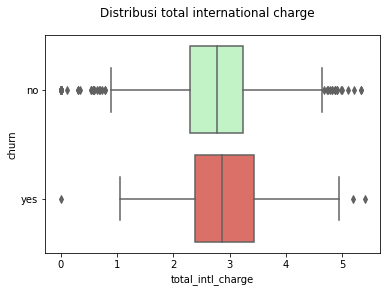

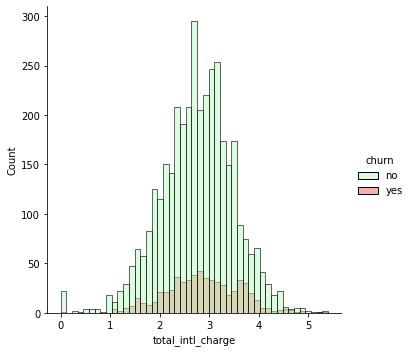

In [51]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi total international charge')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['total_intl_charge'], palette=palette)
sns.displot(x=train['total_intl_charge'], hue=train['churn'], palette=palette)
plt.show()

In [52]:
train.groupby('churn').agg(
    med_intl_charge=('total_intl_charge','median')
    ).reset_index()

,churn,med_intl_charge
0,no,2.78
1,yes,2.86


observasi:
- memiliki nilai yang relatif sama
- international feature secara durasi, jumlah, dan charge tidak berpengaruh pada cust churn

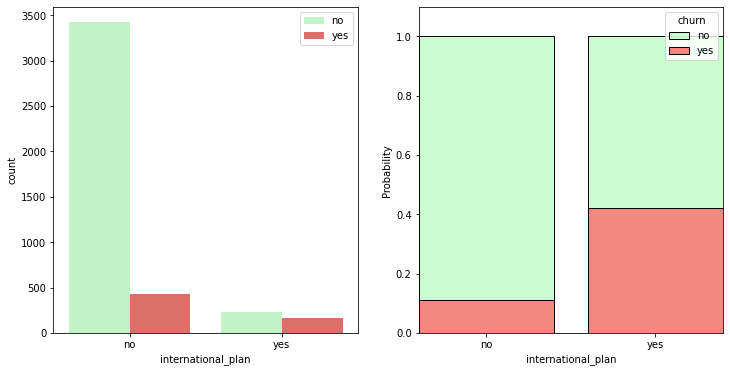

In [53]:
# cek berapa dan probability cust churn by international plan
fig, ax = plt.subplots(1,2,figsize=(12,6))
palette = ['#b9fbc0', '#ee6055']

sns.countplot(ax=ax[0], data=train, x=train['international_plan'],
              hue=train['churn'], palette=palette)
sns.histplot(ax=ax[1], data=train, x=train['international_plan'],
              hue=train['churn'], stat='probability', multiple='fill',
             shrink=.8, palette=palette)
ax[0].legend(loc='upper right')
ax[1].set_ylim(0,1.1)
plt.show()

## Check Customer Service Feature

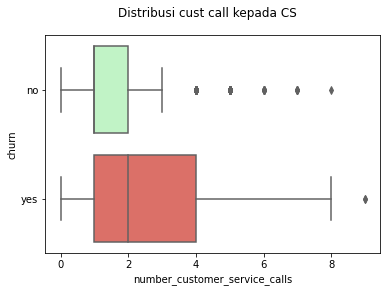

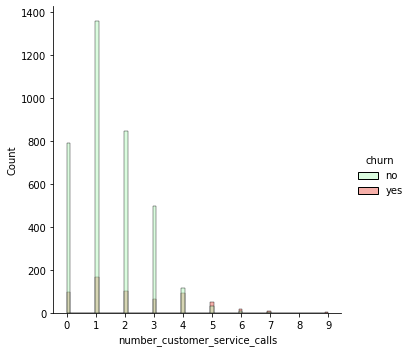

In [54]:
# cek outlier dan distribusi data
fig, ax = plt.subplots(figsize=(6,4))
fig.suptitle('Distribusi cust call kepada CS')
palette = ['#b9fbc0', '#ee6055']
sns.boxplot(y=train['churn'], x=train['number_customer_service_calls'],
            palette=palette)
sns.displot(x=train['number_customer_service_calls'], hue=train['churn'],
            palette=palette)
plt.xticks(list(range(0,10)))
plt.show()


observasi:
- distribusi skew positif
- probability cust churn lebih banyak ketika sudal call customer service lebih dari 3 kali

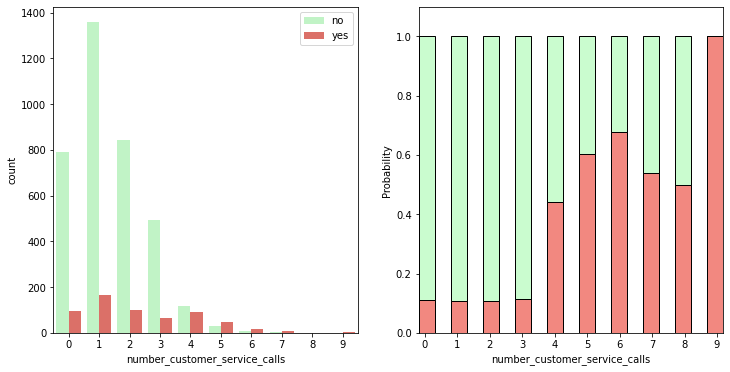

In [55]:
# preview churn rate berdasar jumlah komplain kepada customer service
fig, ax = plt.subplots(1,2,figsize=(12,6))
palette = ['#b9fbc0', '#ee6055']

sns.countplot(ax=ax[0], data=train, x=train['number_customer_service_calls'],
              hue=train['churn'],palette=palette)
sns.histplot(ax=ax[1], data=train, x=train['number_customer_service_calls'],
              hue=train['churn'], stat='probability', multiple='fill',
             shrink=4, legend=False, palette=palette)
ax[0].legend(loc='upper right')
plt.xticks(list(range(0,10)))
ax[1].set_ylim(0,1.1)
plt.show()

observasi:
- terlihat ketika cust sudah komplain lebih dari 3 kali probability untuk churn meningkat

In [56]:
cs = train.groupby(['churn','number_customer_service_calls']).agg(
    jumlah_cust_churn=('churn','count')
    ).reset_index()

In [57]:
cs_pivot = pd.pivot_table(cs,
                          index='churn',
                          columns='number_customer_service_calls')
cs_pivot.columns = [str(j) for j in cs_pivot.columns.get_level_values(1)]

call_cs = cs_pivot.reset_index()
call_cs

,churn,0,1,2,3,4,5,6,7,8,9
0,no,789.0,1358.0,845.0,495.0,117.0,32.0,9.0,6.0,1.0,NaN
1,yes,97.0,166.0,102.0,63.0,92.0,49.0,19.0,7.0,1.0,2.0


observasi:
- terlihat bahwa dari jumlah customer call 4 kali kepada customer service hampir 50% itu churn

In [58]:
# group jika < 4 itu masih di ambang toleransi jika tidak sebaliknya
def label(x):
  if x<4:
    return 'tolerant'
  else:
    return 'intolerant'

In [59]:
train['cat_complaint'] = train['number_customer_service_calls'].apply(label)

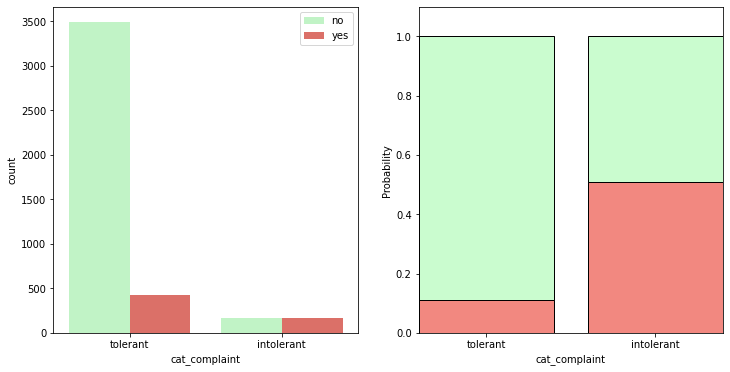

In [60]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
palette = ['#b9fbc0', '#ee6055']

sns.countplot(ax=ax[0], data=train, x=train['cat_complaint'],
              hue=train['churn'], palette=palette)
sns.histplot(ax=ax[1], data=train, x=train['cat_complaint'],
              hue=train['churn'], stat='probability', multiple='fill',
             shrink=.8, legend=False, palette=palette)
ax[0].legend(loc='upper right')
ax[1].set_ylim(0,1.1)
plt.show()

In [61]:
cs1 = train.groupby(['churn','cat_complaint']).agg(
    jumlah_cust_churn=('churn','count')
    ).reset_index()

In [62]:
cs1_pivot = pd.pivot_table(cs1,
                          index='churn',
                          columns='cat_complaint')
cs1_pivot.columns = [str(j) for j in cs1_pivot.columns.get_level_values(1)]

cat = cs1_pivot.reset_index()
cat

,churn,intolerant,tolerant
0,no,165,3487
1,yes,170,428


observasi:
- probability meningkat cukup pesat jika sudah intolerant
- hampir 60% cust bakal churn dari jumlah yang intoleran atau hampir 30% cust churn dari total churn jika sudah intolerant

siapa mereka?apa kita bisa tahu asal mereka?mari dicoba

In [63]:
# lakukan groupby berdasar state dan churn dengan value median dari jumlah call CS
cust_service = train.groupby(['state','churn']).agg(
    total_cs=('number_customer_service_calls','median')
    ).reset_index()
cust_service

,state,churn,total_cs
0,AK,no,1.0
1,AK,yes,1.5
2,AL,no,1.0
3,AL,yes,2.0
4,AR,no,1.0
...,...,...,...
97,WI,yes,2.0
98,WV,no,1.0
99,WV,yes,1.0
100,WY,no,1.0


In [64]:
# lakukan pivot tabel dan preview state mana yang memiliki nilai tinggi
df_pivotCS = pd.pivot_table(cust_service,
               index='state',
               columns='churn',
               values='total_cs',
               aggfunc='sum')
df_pivotCS.sort_values('yes', ascending=False).head(5)

churn,no,yes
state,,
AR,1.0,4.0
LA,1.0,4.0
GA,2.0,3.0
IA,1.0,3.0
NH,1.0,3.0


observasi:
- diraih lah top 2 state berdasar nilai median cust churn yang melakukan call kepada cust service yaitu Arkansas(AR) dan Louisiana(LA)

# Preprocessing

## Outliers

berdasar distribusi data EDA banyak sekali outlier,tapi berapa tepatnya?

In [65]:
# hitung jumlah baris sebelum deteksi outlier
print(f'Jumlah baris sebelum memfilter outlier: {len(train[nums])}')

filtered_entries = np.array([True] * len(train[nums]))
for col in nums :
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((train[col] >= low_limit) & (train[col] <= high_limit)) & filtered_entries
    
train_outlier = train[filtered_entries]

# hitung jumlah baris setelah outlier
print(f'Jumlah baris setelah memfilter outlier: {len(train_outlier)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


terdapat sekitar 18%an dari total baris data yang termasuk outlier, akan tetapi data tersebut wajar. seperti cust ada yang tidak sedang menelepon berarti nilai nya 0(nol) dengan cust yang menggunakan telepon hingga berjam-jam (60 menit bahkan lebih) masih wajar.

## Feature Encoding

In [66]:
# merubah tipe data pada kolom kategorikal menjadi numeric
# yaitu kolom churn, voice_mail_plan, international_plan
def convert(x):
    if x == 'yes':
        hasil = 1
    else:
        hasil = 0
    return hasil

In [67]:
train['churn'] = train['churn'].apply(convert)
train['voice_mail_plan'] = train['voice_mail_plan'].apply(convert)
train['international_plan'] = train['international_plan'].apply(convert)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

sudah melakukan encoding terhadap categoric fitur menjadi numeric fitur kecuali:
1. kolom 'state'
karena kolom ini memiliki tingkat kardinalitas yang tinggi jika diterapkan one hot encoding maka akan menambah banyak kolom sekitar 51 dan dapat menyebabkan *curse of dimension*.
2. kolom 'area_code'
karena kolom ini berisi 3 kode area di negara bagian california

maka dari itu akan di drop nantinya

## Correlation

In [68]:
#korelasi
corr = train.corr()

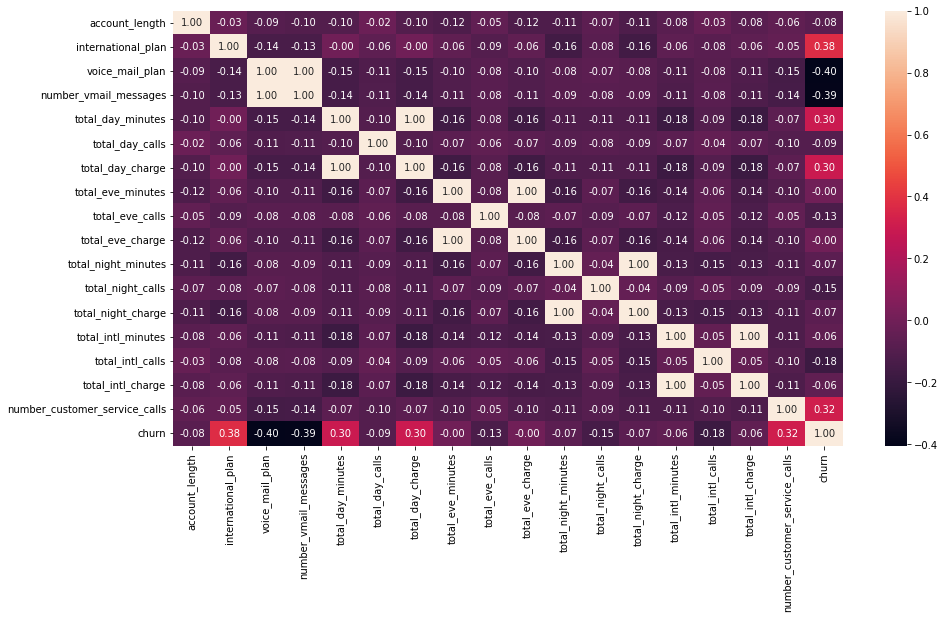

In [69]:
# visualisasikan dengan heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr.corr(), annot=True, fmt='.2f')
plt.show()

sekilas antar fitur tidak memiliki korelasi yang tinggi. kecuali,pada fitur durasi dengan total tagihan(seperti day minutes dan charge, dsb) dan fitur total voice mail dengan voice mail plan. fitur yg memiliki korelasi tinggi tersebut bisa menyebabkan multicollinearity maka hal tersebut perlu ditangani.

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   int64  
 4   voice_mail_plan                4250 non-null   int64  
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [71]:
# menghapus kolom yang tidak perlu
# dan menghapus kolom yang memiliki korelasi tinggi
col_to_drop = ['state', 'area_code', 'cat_complaint', 'number_vmail_messages',
               'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
               'total_intl_minutes']

# drop kolom yang tidak perlu
train = train.drop(columns=col_to_drop, axis=1)

## Normalization

karena rentang nilai di tiap fitur itu berbeda seperti hal nya fitur 'account_length' berkisar dari 1 bulan hingga 73 bulan sedangkan fitur lain seperti 'total_day_minutes' berkisar dari 0 hingga 351 menit. maka dari itu perlu dilakukan normalization

In [72]:
# deskriptif statistik sebelum dilakukan scaling
train.describe()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,0.093176,0.261647,99.907294,30.644682,100.176471,17.015012,99.839529,9.023892,4.426353,2.769654,1.559059,0.140706
std,39.698401,0.290714,0.439583,19.850817,9.182096,19.908591,4.271212,20.093220,2.265922,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,0.000000,87.000000,24.365000,87.000000,14.102500,86.000000,7.522500,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,0.000000,100.000000,30.680000,100.000000,17.060000,100.000000,9.020000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,113.000000,36.750000,114.000000,19.867500,113.000000,10.560000,6.000000,3.240000,2.000000,0.000000
max,243.000000,1.000000,1.000000,165.000000,59.760000,170.000000,30.540000,175.000000,17.770000,20.000000,5.400000,9.000000,1.000000


In [73]:
# lakukan scaling pada data train
for col in train:
  scaler = MinMaxScaler()
  train[col] = scaler.fit_transform(train[col].values.reshape(len(train), 1))

In [74]:
# hasil setelah scaling
train.describe()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,0.410067,0.093176,0.261647,0.605499,0.512796,0.589273,0.557139,0.570512,0.507816,0.221318,0.512899,0.173229,0.140706
std,0.164043,0.290714,0.439583,0.120308,0.153650,0.117109,0.139856,0.114818,0.127514,0.123153,0.138001,0.145715,0.347759
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.297521,0.000000,0.000000,0.527273,0.407714,0.511765,0.461771,0.491429,0.423326,0.150000,0.425926,0.111111,0.000000
50%,0.409091,0.000000,0.000000,0.606061,0.513387,0.588235,0.558612,0.571429,0.507597,0.200000,0.514815,0.111111,0.000000
75%,0.520661,0.000000,1.000000,0.684848,0.614960,0.670588,0.650540,0.645714,0.594260,0.300000,0.600000,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Imbalance Data Handling

karena cust churn berjumlah 598 cust sedangkan cust yang tidak churn itu 3652 cust membuat data tersebut imbalance, maka perlu imbalance data handling

In [75]:
# mengecek jumlah cust yg churn dan yg tidak
target = train['churn'].value_counts().reset_index()
target.rename(columns={'index':'churn','churn':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,churn,freq,percentage
0,0.0,3652,85.93
1,1.0,598,14.07


In [76]:
# imbalance data handling menggunakan SMOTE
smote = over_sampling.SMOTE(random_state=42)

X = train.drop(columns = 'churn')
Y = train['churn']
X_smote, y_smote = smote.fit_resample(X,Y)

print(f''' shape of X before SMOTE:{X.shape}
      shape of X after SMOTE:{X_smote.shape}''')

print('\nbalance of positive & negative classes (%):')
y_smote.value_counts(normalize=True)*100

 shape of X before SMOTE:(4250, 12)
      shape of X after SMOTE:(7304, 12)

balance of positive & negative classes (%):


0.0    50.0
1.0    50.0
Name: churn, dtype: float64

In [77]:
y_smote.value_counts()

0.0    3652
1.0    3652
Name: churn, dtype: int64

Teknik Oversampling Minoritas Sintetis (SMOTE) adalah teknik statistik untuk meningkatkan jumlah kasus dalam himpunan data Anda dengan cara yang seimbang. Komponen bekerja dengan menghasilkan instans baru dari kasus minoritas yang ada yang Anda berikan sebagai input. Implementasi SMOTE ini tidak mengubah jumlah kasus mayoritas.
https://learn.microsoft.com/id-id/azure/machine-learning/component-reference/smote

# Modelling

In [78]:
# train test split sebelum modelling
X_train, X_test,y_train,y_test = train_test_split(X_smote, y_smote,
                                                test_size = 0.2,
                                                random_state = 42)

Logistic Regression(as baseline)

In [79]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Decision Tree Classifier

In [80]:
dct = DecisionTreeClassifier(random_state=42)
dct.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

K Neighbors Classifier

In [81]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Random Forest Classifier

In [82]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Support Vector Machine

In [83]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

SVC(random_state=42)

XGBoost

In [84]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(random_state=42)

# Model Evaluation

mengevaluasi dari tiap pemodelan machine learning

performa logreg:
              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       758
         1.0       0.78      0.81      0.80       703

    accuracy                           0.80      1461
   macro avg       0.80      0.80      0.80      1461
weighted avg       0.80      0.80      0.80      1461



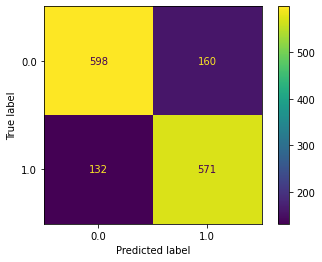


performa dct:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       758
         1.0       0.92      0.95      0.94       703

    accuracy                           0.94      1461
   macro avg       0.94      0.94      0.94      1461
weighted avg       0.94      0.94      0.94      1461



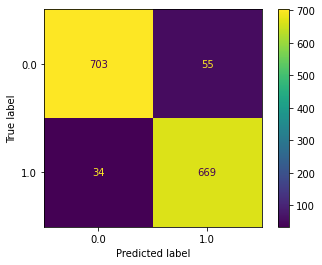


performa knn:
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90       758
         1.0       0.84      0.99      0.91       703

    accuracy                           0.91      1461
   macro avg       0.92      0.91      0.91      1461
weighted avg       0.92      0.91      0.91      1461



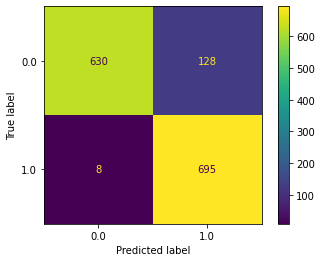


performa rfc:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       758
         1.0       0.98      0.95      0.96       703

    accuracy                           0.97      1461
   macro avg       0.97      0.97      0.97      1461
weighted avg       0.97      0.97      0.97      1461



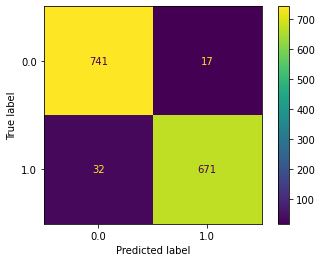


performa svm:
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       758
         1.0       0.90      0.89      0.89       703

    accuracy                           0.90      1461
   macro avg       0.90      0.90      0.90      1461
weighted avg       0.90      0.90      0.90      1461



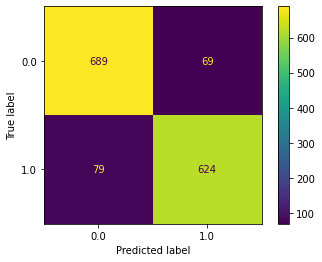


performa xgb:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       758
         1.0       0.97      0.92      0.94       703

    accuracy                           0.95      1461
   macro avg       0.95      0.95      0.95      1461
weighted avg       0.95      0.95      0.95      1461



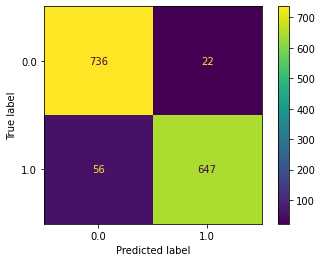

In [85]:
models = [logreg, dct, knn, rfc, svm, xgb]
str_model = ['logreg', 'dct', 'knn', 'rfc', 'svm', 'xgb']

for model, str_mod in zip(models, str_model):
  prediction = model.predict(X_test)
  cm = confusion_matrix(y_test, prediction,labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  print(f'performa {str_mod}:')
  #print(confusion_matrix(y_test, prediction))
  print(classification_report(y_test, prediction))
  disp.plot()
  plt.show()
  print()

fokus kepada recall. Recall secara definisi adalah perbandingan antara True Positive (TP) dengan banyaknya data yang sebenarnya positif. kenapa recall? karena kita ingin **model kita memprediksi customer itu churn padahal tidak** hal tersebut lebih baik bagi perusahaan telecom dari pada **model kita memprediksi customer itu tidak churn padahal terkena customer itu churn**.
https://stevkarta.medium.com/membicarakan-precision-recall-dan-f1-score-e96d81910354

terlihat bahwa score dari tiap pemodelan cukup baik min di 79% dengan model yang paling simpel yaitu logistic regression sebagai baseline model kita dan dengan  model lainnya rata-rata diatas 90%

# Model Validation

kita akan melakukan validasi model dengan menggunakan K-fold cross validation method dengan melipat data sebanyak K dan mengulangi (men-iterasi) experimennya sebanyak K juga.
https://piyut-dyoni.medium.com/machine-learning-buat-yang-ngerasa-bodo-e37bc5b26d9d

In [86]:
kfold = model_selection.KFold(n_splits=10,shuffle=True,
                              random_state=42)

In [87]:
for model,str_mod in zip(models, str_model):
  result = model_selection.cross_val_score(model, X, Y, cv=kfold,
                                           scoring='accuracy')
  print(f'Model {str_mod}:')
  print('Accuracy:%.2f%% (%.2f%%)' % (result.mean()*100, result.std()*100))

Model logreg:
Accuracy:86.71% (1.55%)
Model dct:
Accuracy:92.02% (1.75%)
Model knn:
Accuracy:89.84% (0.92%)
Model rfc:
Accuracy:95.65% (1.02%)
Model svm:
Accuracy:90.89% (1.20%)
Model xgb:
Accuracy:95.79% (0.92%)


XGBoost classifier merupakan model terbaik dengan meraih score di 95.69% dengan memiliki nilai validitas paling besar dibanding model lain.

## Hyperparameter Tuning

kita akan melakukan parameter tuning dengan metode GridSearch CV. Grid Search Cross Validation adalah metode pemilihan kombinasi model dan hyperparameter dengan cara menguji coba satu persatu kombinasi dan melakukan validasi untuk setiap kombinasi. Tujuannya adalah menentukan kombinasi yang menghasilkan performa model terbaik yang dapat dipilih untuk dijadikan model untuk prediksi.
https://algotech.netlify.app/blog/gridsearchcv/

In [88]:
# Print default setting
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [89]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 10,
    verbose=True,
)

In [90]:
print(grid_search)

GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='accuracy', verbose=True)


In [91]:
# fit to data train
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='accuracy', verbose=True)

In [92]:
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 140}


diatas merupakan best parameter yang bisa didapatkan

In [93]:
# fungsi untuk evaluasi model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    cm = confusion_matrix(y_test, predictions,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    # print classification report
    print(classification_report(test_labels, predictions))
    disp.plot()
    plt.show()
    print()

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       758
         1.0       0.97      0.92      0.94       703

    accuracy                           0.95      1461
   macro avg       0.95      0.95      0.95      1461
weighted avg       0.95      0.95      0.95      1461



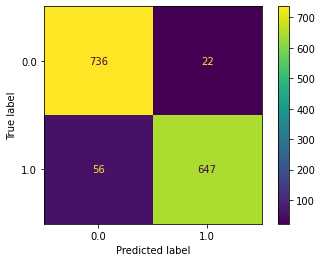


              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       758
         1.0       0.98      0.97      0.97       703

    accuracy                           0.98      1461
   macro avg       0.98      0.98      0.98      1461
weighted avg       0.98      0.98      0.98      1461



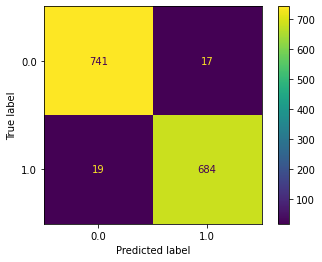

In [94]:
#evaluasi base model xgb
base_xgb = XGBClassifier(random_state = 42)
base_xgb.fit(X_train, y_train)
base_accuracy = evaluate(base_xgb, X_test, y_test)
# dengan best parameter xgb
best_xgb = grid_search.best_estimator_
random_accuracy = evaluate(best_xgb, X_test, y_test)

terlihat bahwa perbedaan antara base model xgb dan best xgb tidak terlalu signifikan. dan hasil ini merupakan hasil akhir yang paling baik yang bisa didapatkan

# Testing


disini kita akan melakukan testing menggunakan dataset yang berbeda. mari kita lakukan langkah-langkah yang perlu seperti sebelumnya

In [95]:
test = pd.read_csv('test.csv')

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [97]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [98]:
def convert(x):
    if x == 'yes':
        hasil = 1
    else:
        hasil = 0
    return hasil

In [99]:
test['voice_mail_plan'] = test['voice_mail_plan'].apply(convert).astype(int)
test['international_plan'] = test['international_plan'].apply(convert).astype(int)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    int64  
 5   voice_mail_plan                750 non-null    int64  
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [100]:
col_to_drop = ['state', 'area_code', 'id', 'number_vmail_messages',
               'total_day_minutes', 'total_eve_minutes', 'total_night_minutes',
               'total_intl_minutes']

# drop kolom yang tidak perlu
test = test.drop(columns=col_to_drop, axis=1)

In [101]:
for num in test:
  scaler = MinMaxScaler()
  test[num] = scaler.fit_transform(test[num].values.reshape(len(test), 1))


In [102]:
test.describe()

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.419347,0.102667,0.281333,0.497753,0.496399,0.498215,0.517590,0.566479,0.474669,0.236070,0.545085,0.272444
std,0.167506,0.303726,0.449950,0.159020,0.157429,0.152500,0.156958,0.122982,0.164462,0.127468,0.146609,0.212701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.308017,0.000000,0.000000,0.395161,0.396366,0.393701,0.407909,0.487179,0.362589,0.157895,0.451961,0.166667
50%,0.421941,0.000000,0.000000,0.500000,0.489741,0.503937,0.517870,0.567308,0.474113,0.210526,0.545098,0.166667
75%,0.527426,0.000000,1.000000,0.604839,0.601374,0.598425,0.615977,0.647436,0.586879,0.315789,0.641176,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
churn = best_xgb.predict(test)

In [104]:
series_churn = pd.Series(churn).astype(int)
series_churn

0      0
1      0
2      1
3      1
4      1
      ..
745    0
746    0
747    0
748    1
749    0
Length: 750, dtype: int64

In [105]:
result = pd.concat([test,pd.Series(churn)],axis=1)
result

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,0
0,0.535865,0.0,1.0,0.572581,0.746653,0.488189,0.500000,0.506410,0.618440,0.157895,0.529412,0.166667,0.0
1,0.493671,1.0,0.0,0.475806,0.623370,0.503937,0.569710,0.679487,0.488652,0.315789,0.333333,0.000000,0.0
2,0.257384,0.0,0.0,0.250000,0.319770,0.307087,0.830149,0.557692,0.485816,0.315789,0.694118,0.666667,1.0
3,0.388186,0.0,0.0,0.604839,0.526691,0.582677,0.562633,0.698718,0.251064,0.157895,0.429412,0.500000,1.0
4,0.729958,0.0,0.0,0.298387,0.330377,0.590551,0.739561,0.660256,0.637589,0.263158,0.821569,0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.544304,0.0,0.0,0.483871,0.315945,0.472441,0.587049,0.634615,0.484397,0.368421,0.598039,0.000000,0.0
746,0.303797,0.0,0.0,0.637097,0.486698,0.370079,0.719745,0.641026,0.609220,0.105263,0.650980,0.500000,0.0
747,0.637131,0.0,0.0,0.411290,0.507390,0.283465,0.678698,0.647436,0.519149,0.105263,0.778431,0.500000,0.0
748,0.253165,0.0,0.0,0.403226,0.378543,0.716535,0.426044,0.544872,0.515603,0.210526,0.719608,0.166667,1.0


In [106]:
result.rename(columns={0:'churn'}, inplace=True)
result

,account_length,international_plan,voice_mail_plan,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0.535865,0.0,1.0,0.572581,0.746653,0.488189,0.500000,0.506410,0.618440,0.157895,0.529412,0.166667,0.0
1,0.493671,1.0,0.0,0.475806,0.623370,0.503937,0.569710,0.679487,0.488652,0.315789,0.333333,0.000000,0.0
2,0.257384,0.0,0.0,0.250000,0.319770,0.307087,0.830149,0.557692,0.485816,0.315789,0.694118,0.666667,1.0
3,0.388186,0.0,0.0,0.604839,0.526691,0.582677,0.562633,0.698718,0.251064,0.157895,0.429412,0.500000,1.0
4,0.729958,0.0,0.0,0.298387,0.330377,0.590551,0.739561,0.660256,0.637589,0.263158,0.821569,0.500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.544304,0.0,0.0,0.483871,0.315945,0.472441,0.587049,0.634615,0.484397,0.368421,0.598039,0.000000,0.0
746,0.303797,0.0,0.0,0.637097,0.486698,0.370079,0.719745,0.641026,0.609220,0.105263,0.650980,0.500000,0.0
747,0.637131,0.0,0.0,0.411290,0.507390,0.283465,0.678698,0.647436,0.519149,0.105263,0.778431,0.500000,0.0
748,0.253165,0.0,0.0,0.403226,0.378543,0.716535,0.426044,0.544872,0.515603,0.210526,0.719608,0.166667,1.0


In [107]:
result['churn'].value_counts()

1.0    382
0.0    368
Name: churn, dtype: int64

In [108]:
result = result['churn'].value_counts().reset_index()
result.rename(columns={'index':'churn','churn':'freq'}, inplace=True)
result['percentage'] = round((result['freq']/result['freq'].sum())*100,2)
result

,churn,freq,percentage
0,1.0,382,50.93
1,0.0,368,49.07


berikut adalah prediksi dari model best XGBoost Classifier yang dapat kita capai. dengan dibantu model tersebut kita bisa fokus untuk memberikan treatment lebih kepada cust yang kemungkinan akan churn

# Features Importance

In [109]:
best_xgb.feature_importances_

array([0.01625861, 0.32030898, 0.13047208, 0.01733783, 0.10744483,
       0.01598736, 0.04987878, 0.01798951, 0.02274364, 0.06101117,
       0.04502792, 0.19553934], dtype=float32)

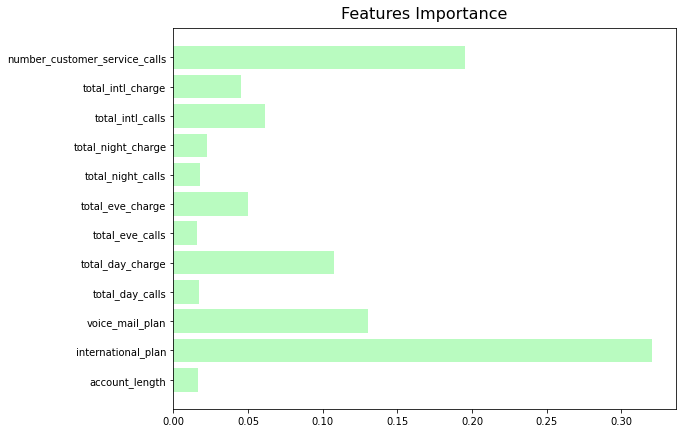

In [110]:
plt.figure(figsize=(9,7))
plt.barh(X.columns, best_xgb.feature_importances_, color='#b9fbc0')
plt.title('Features Importance', fontsize=16, pad=10)
plt.show()

berdasarkan features importance, fitur international plan yang paling berpengaruh, lalu jumlah telepon kepada customer service, kemudian voice mail plan. sehingga perusahaan dapat menaruh fokus pada fitur - fitur tersebut.